EECE454 - Introduction to Machine Learning System

# PA2-4: Optimizer

made by Minkyu Kim, revised by Minjae Park <br>

## Instructions

In this exercise, you need to implement various optimizers on CIFAR-10. You will test the performance of various optimizers by using TwoLayerNet.

Before starting this programming exercise, we strongly recommend to review the lecture notes used in this course.

If you have any questions, please send a mail to TA(mjae.park@postech.ac.kr)


In [ ]:
# Run some setup code for this notebook.
from cores.data_utils import get_CIFAR10_data
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
# Load the (preprocessed) CIFAR10 data.
CIFAR10_dataset = get_CIFAR10_data()
for k, v in list(CIFAR10_dataset.items()):
  print(('%s: ' % k, v.shape))

## Neural Network

In [ ]:
# Instruction : Copy & paste the implemented 'TwoLayerNet', 'get_gradient', 'loss_function' from PA1_3

from builtins import object
import torch

class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    N, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - (fully connected layer) - (ReLU) - (fully connected layer) - (softmax)

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        
        self.params = {}
        self.params['W1'] = std * torch.randn(input_size, hidden_size)
        self.params['b1'] = torch.zeros(hidden_size)
        self.params['W2'] = std * torch.randn(hidden_size, output_size)
        self.params['b2'] = torch.zeros(output_size)
    
    def ReLU(self, X) :
        ###################################################
        # TODO: Implement the ReLU activation function    # 
        ###################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        pass
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    def SoftMax(self, X) :
        #########################################################################
        # TODO: Implement the SoftMax activation function                       #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        pass
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    def forward(self, X) :
        """
        The method that calculate the output of neural net by using input data(i.e. X) for training
        
        Inputs:
        X: a torch tensor of size(N, D)
        
        Outputs:
        out : a torch tensor of size(N, number_of_classes)
        (Note that in forward(), you should not use Softmax)
        """
        
        out = None
        #########################################################################
        # TODO: Implement the code that gets ouptut by using input data and     #
        # the parameter of models(i.e. weight, bias) and ReLU                   #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        
        pass
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        return out
    
    def prediction(self, X) :
        """
        The method that calculate the output of neural net by using input data(i.e. X) for prediction
        
        Inputs:
        X: a torch tensor of size(N, D)
        
        Outputs:
        pred : a torch tensor of size(N, number_of_classes) that represent a probability
        """

        pred = self.forward(X)
        pred = self.SoftMax(pred)
        
        
        return pred
    

def get_gradient(net, X, y, n_cls) :
    """
    The method that compute the gradient with respect to parameters
    Inputs:
    - net: The neural network
    - X, y: training data pair(X: input, y: label)
    """
    gradient = {key : None for key in list(net.params.keys())}
    #############################################################################################################################################
    # TODO: Implement the backward pass                                                                                                         #
    # Hint: if the result of cross entropy loss 'L' and the output of network 'y_hat' and label 'y' are exist, then dL/dz = softmax(y_hat) - y  #
    # (reference : https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1)       # 
    # Therefore, we do not use loss as the input of get_gradient()                                                                              #
    #############################################################################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    pass
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return gradient


def loss_function(net, X, y, n_cls) :
    """
    The method that calculate the loss that is used to train the neural network.
    For training the neural network, we use the CrossEntropyLoss that is usually used for training classification.
    (CrossEntropyLoss: https://gombru.github.io/2018/05/23/cross_entropy_loss/)
    Inputs:
        
    - net: The neural network
    - X, y: training data pair(X: input, y: label)
    """
    
    y_hat = net.forward(X)
    loss = None
    ###################################################################################
    # TODO: Implement the CrossEntropyLoss                                            #
    # Hint: use torch.nn.functional.one_hot(y, num_classes=n_cls) to make label       #
    ###################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    pass
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return loss.item()

### SGD

In this exercise, we will see the implemented code of SGD(Stochastic Gradient Descent). <br>
SGD is an iterative method for optimizing an objective function with suitable smoothness properties. <br>
reference: https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [ ]:
# Same with 'update_network' in PA2-2
def SGD(params, grads, learning_rate):
    """
    Performs vanilla stochastic gradient descent.

    Inputs:
    - params: weight/bias of neural net
    - grad: Gradients with respect to weight/bias
    - learning_rate: determines the step size 
    """
    for key in list(params.keys()) :
        params[key] -= learning_rate*grads[key]

    return params

In [ ]:
# Check if the implemented optimizer creates works properly
import copy

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
learning_rate = 1e-4

torch.random.manual_seed(454)
net_toy = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
X = 10 * torch.randn(num_inputs, input_size)
y = torch.Tensor([0, 1, 2, 2, 1]).type(torch.LongTensor)

params_before_update = copy.deepcopy(net_toy.params)

for i in range(2) :
    grads = get_gradient(net_toy, X, y, num_classes)
    net_toy.params = SGD(net_toy.params, grads, learning_rate)

params_after_update_sgd = net_toy.params

print(f"params_before_update['b2']: {params_before_update['b2']}")
print(f"params_after_update_sgd['b2']: {params_after_update_sgd['b2']}\n")

### SGD_momentum

In this exercise, we will develope the SGD with momentum. <br>
This monentum helps accelerate gradients vectors in the right directions, thus leading to faster converging. <br>
The equation of SGD with momentum is like below(V_(t-1) means gradient at (t-1)-th time): 

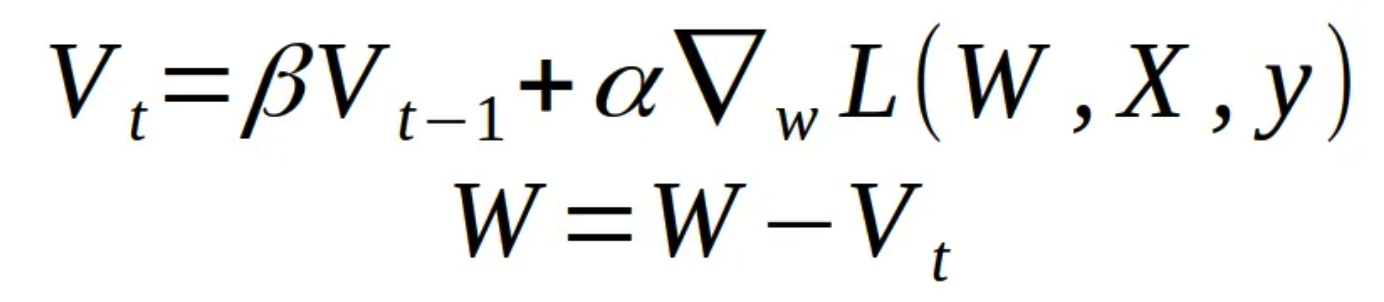

The following attachted figure will help you to understand the difference between two optimiezrs. <br>

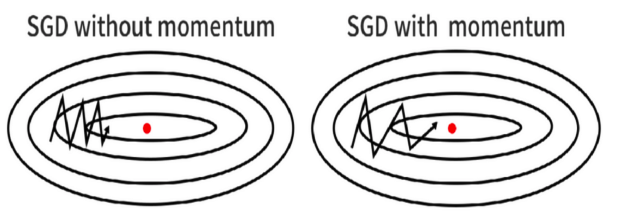

reference: <br>
https://paperswithcode.com/method/sgd-with-momentum <br>
https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d


In [ ]:
# Instruction: Implement the SGD_with_momentum
def SGD_with_momentum(params, grads, momentum, previous_grads, learning_rate):
    """
    Performs stochastic gradient descent with momentum.

    Inputs:
    - params: weight/bias of neural net
    - grad: Gradients with respect to weight/bias
    - momentum: the ratio of using gradients from previous time
    - learning_rate: determines the step size 
    """
    ###########################################################################
    # TODO: Implement the SGD with momentum.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    pass
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return params, grads

In [ ]:
# Check if the implemented optimizer creates works properly
import copy

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
learning_rate = 1e-4
momentum = 0.9


previous_grads = {key : 0.0 for key in list(net_toy.params.keys())}

torch.random.manual_seed(454)
net_toy = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
X = 10 * torch.randn(num_inputs, input_size)
y = torch.Tensor([0, 1, 2, 2, 1]).type(torch.LongTensor)

params_before_update = copy.deepcopy(net_toy.params)

for i in range(2) :
    grads = get_gradient(net_toy, X, y, num_classes)
    net_toy.params, previous_grads = SGD_with_momentum(net_toy.params, grads, momentum, previous_grads, learning_rate)


params_after_update_sgd_momentum = net_toy.params

print(f"params_before_update['b2']: {params_before_update['b2']}")
print("===Comparison===")
print(f"params_after_update_sgd['b2']: {params_after_update_sgd['b2']}")
print(f"params_after_update_sgd_momentum['b2']: {params_after_update_sgd_momentum['b2']}\n")

### AdaGrad

In this exercise, we will develope the AdaGrad(Adaptive Gradient Algorithm) <br>
AdaGrad adapts the learning rate for each feature depending on the estimated geometry of the problem. <br>
The algorithm of AdaGrad is like below:

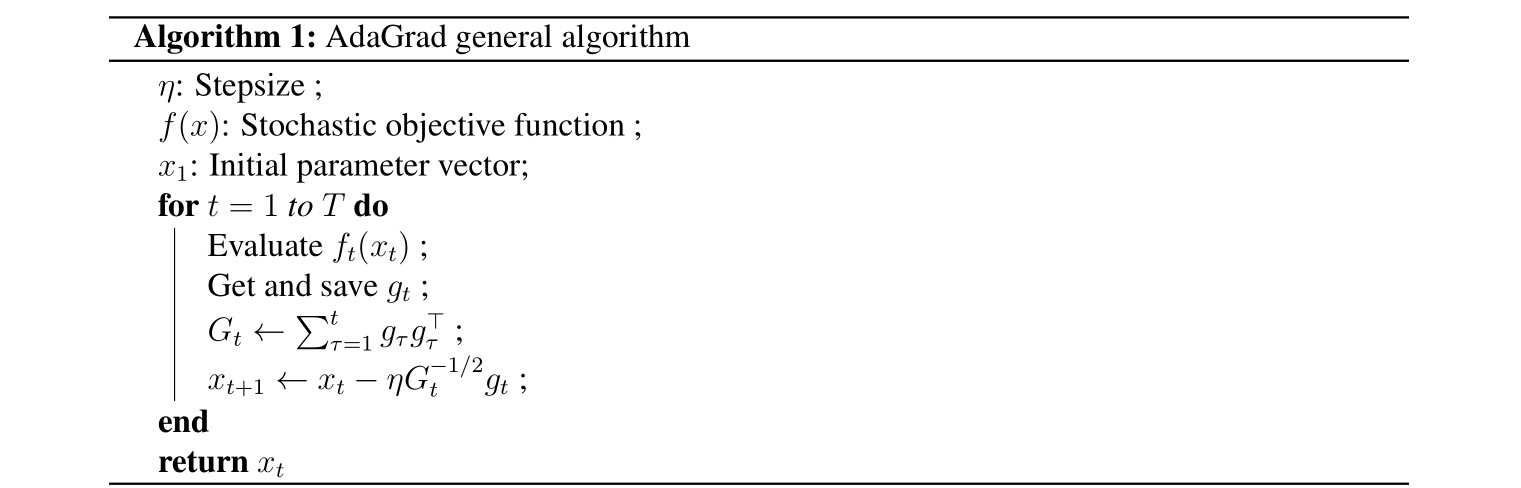

references: <br>
https://optimization.cbe.cornell.edu/index.php?title=AdaGrad

In [ ]:
# Instruction: Implement the AdaGrad
def AdaGrad(params, grads, acc_grads, learning_rate):
    """
    Performs AdaGrad

    Inputs:
    - params: weight/bias of neural net
    - grad: Gradients with respect to weight/bias
    - acc_grads: the overall 
    - learning_rate: determines the step size 
    """
    ###########################################################################
    # TODO: Implement the AdaGrad                                             #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    pass
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return params, acc_grads

In [ ]:
# Instruction: Implement the AdaGrad
def AdaGrad(params, grads, acc_grads, learning_rate):
    """
    Performs AdaGrad

    Inputs:
    - params: weight/bias of neural net
    - grad: Gradients with respect to weight/bias
    - acc_grads: the overall 
    - learning_rate: determines the step size 
    """
    ###########################################################################
    # TODO: Implement the AdaGrad                                             #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    pass
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return params, acc_grads

### Adam

In this exercise, we will develope the Adam(Adaptive Moment Estimation), which is a often used method of optimization.  <br>
Adam is based on adaptive estimation of first-order and second-order moments.
The algorithm of Adam is like below:

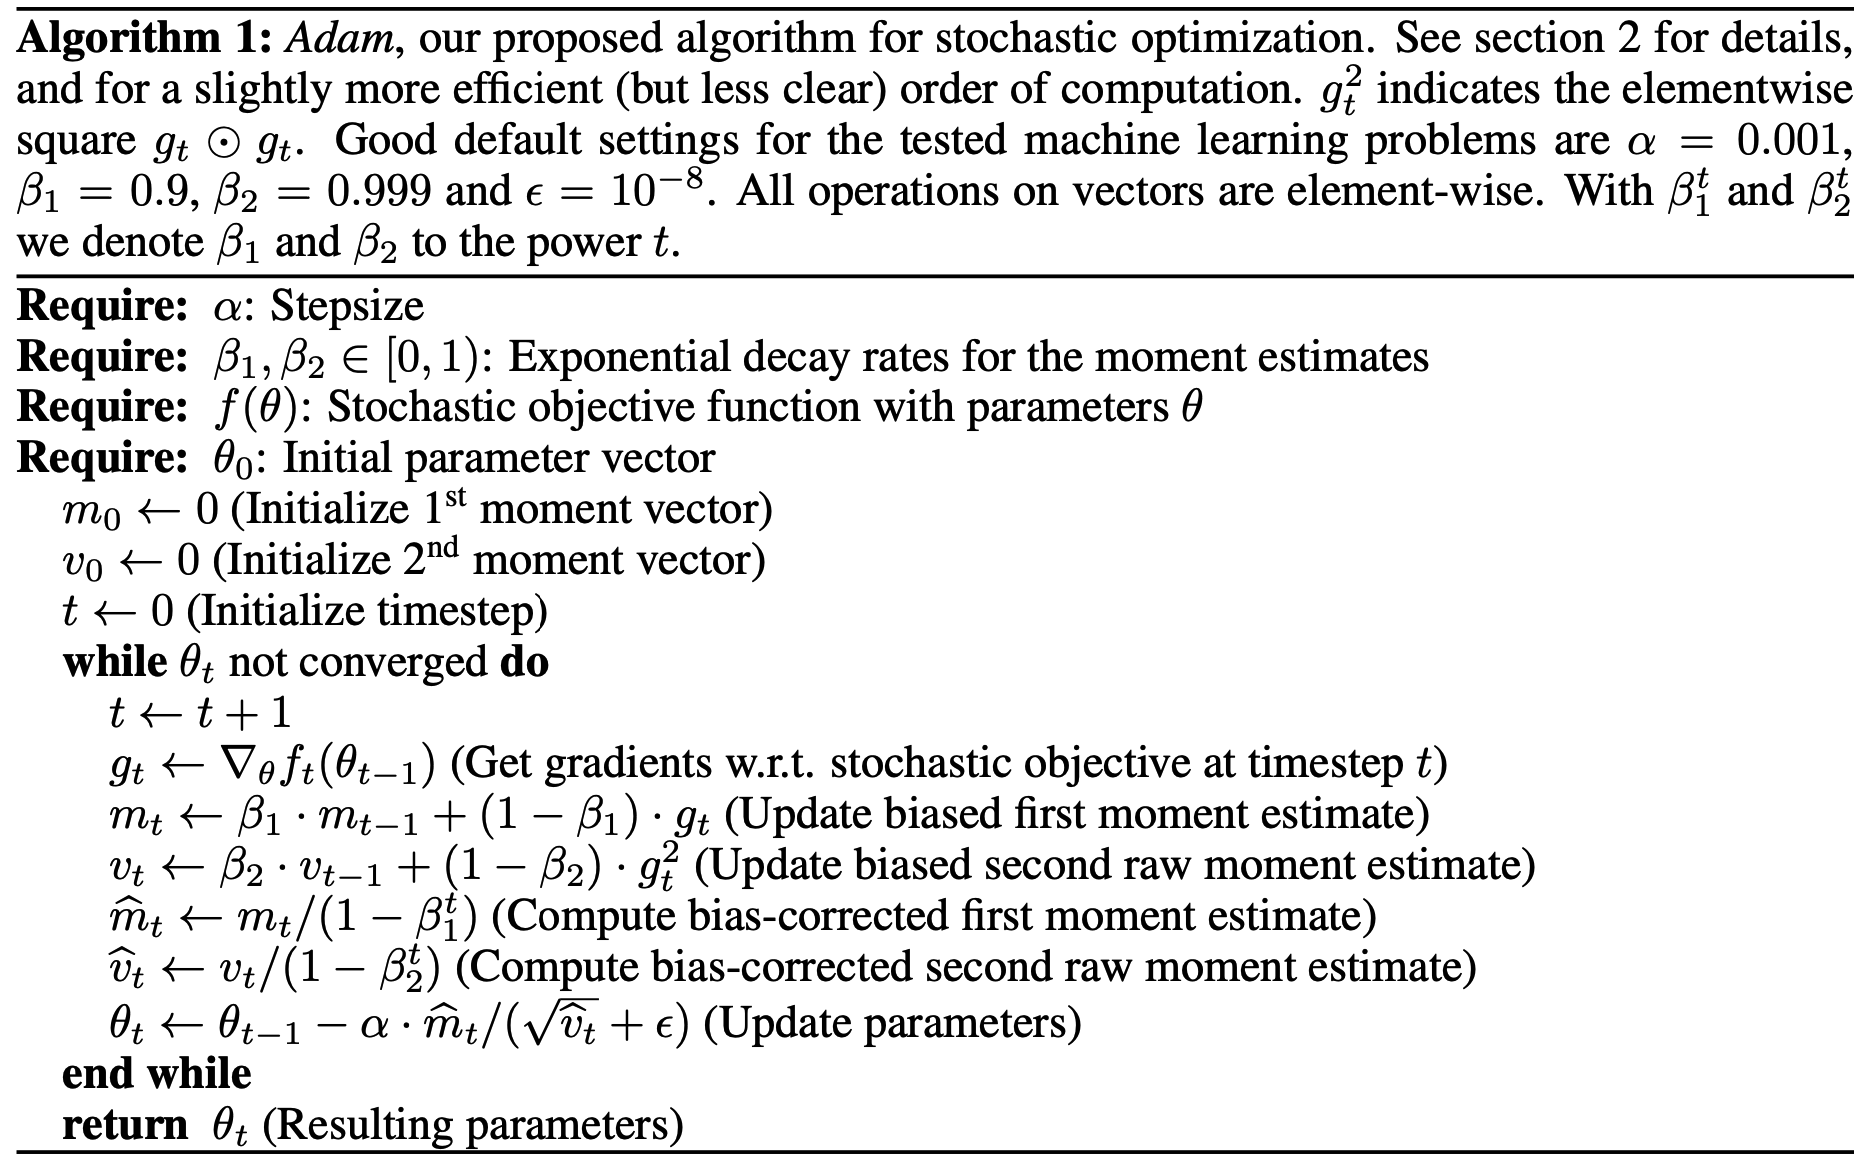

reference: <br>
https://keras.io/api/optimizers/adam/ <br>
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ <br>
https://arxiv.org/abs/1412.6980

In [ ]:
# Instruction: Implement the Adam
def Adam(params, grads, first_moment, second_moment, learning_rate, beta1, beta2, time_step, epsilon):
    """
    Performs Adam

    Inputs:
    - params: weight/bias of neural net
    - grad: Gradients with respect to weight/bias
    - first_momentum: the mean of the gradient
    - second_momentum: the uncentered variance of the gradient
    - learning_rate: determines the step size 
    - beta1, beta2: decay rates for the momentum estimates (scale : 0 ~ 1)
    - epsilon: the value that has a purpose of avoiding 'divide by zero error'
    """
    ###########################################################################
    # TODO: Implement the Adam                                                #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    pass
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return params, first_moment, second_moment

In [ ]:
# Check if the implemented optimizer creates works properly
import copy

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
learning_rate = 1e-4

first_moment = {key : 0.0 for key in list(net_toy.params.keys())}
second_moment = {key : 0.0 for key in list(net_toy.params.keys())}

beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

torch.random.manual_seed(454)
net_toy = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
X = 10 * torch.randn(num_inputs, input_size)
y = torch.Tensor([0, 1, 2, 2, 1]).type(torch.LongTensor)

params_before_update = copy.deepcopy(net_toy.params)

for i in range(2) :
    grads = get_gradient(net_toy, X, y, num_classes)
    net_toy.params, first_moment, second_moment = Adam(net_toy.params, grads, first_moment, second_moment, learning_rate, beta1, beta2, i, epsilon)


params_after_update_adam = net_toy.params

print(f"params_before_update['b2']: {params_before_update['b2']}")
print("===Comparison===")
print(f"params_after_update_sgd['b2']: {params_after_update_sgd['b2']}")
print(f"params_after_update_sgd_momentum['b2']: {params_after_update_sgd_momentum['b2']}")
print(f"params_after_update_ada_grad['b2']: {params_after_update_ada_grad['b2']}")
print(f"params_after_update_adam['b2']: {params_after_update_adam['b2']}\n")

In [ ]:
# Instruction : Copy & paste the implemented 'Train', 'test'
from tqdm import tqdm

def train(net, optimizer, train_X, train_y, valid_X, valid_y, learning_rate, epochs, batch_size, n_cls) :    
    train_loss_history = []
    valid_loss_history = []

    
    if optimizer == SGD_with_momentum :
        previous_grads = {key : 0.0 for key in list(net.params.keys())}
    elif optimizer == AdaGrad :
        acc_grads = {key : 0.0 for key in list(net.params.keys())}
    elif optimizer == Adam :
        first_moment = {key : 0.0 for key in list(net_toy.params.keys())}
        second_moment = {key : 0.0 for key in list(net_toy.params.keys())}
    
    for epoch in range(epochs) :
        num_iter = train_X.size(0) // batch_size
        
        mean_train_loss = 0.0
        for i in tqdm(range(num_iter), desc=f"train, epoch: {epoch + 1}") :
            ########################################################
            # TODO: Implement the training part of train() method. #
            ########################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****            
            pass
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        mean_train_loss /= num_iter

        train_loss_history.append(mean_train_loss)
        
        mean_valid_loss = 0.0
        valid_batch_size = 10 # we set batch_size of valid_size to 10
        valid_num_iter = valid_X.size(0) // valid_batch_size 
        for i in tqdm(range(valid_num_iter), desc=f"valid, epoch: {epoch + 1}") :
            ##########################################################
            # TODO: Implement the validation part of train() method. #
            ##########################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            pass
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        mean_valid_loss /= valid_num_iter
        valid_loss_history.append(mean_valid_loss)
    
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return train_loss_history, valid_loss_history

def test(net, test_X, test_y) :
    
    answer_count = 0
    for idx in range(test_X.size(0)) :
        ##################################################################################################
        # TODO: Implement the test()                                                                     #
        # Hint: If you get accuracy of one input data, you should reshape the size of input as [1, 3072] #                                                              
        ##################################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        pass
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    acc = answer_count/test_X.size(0)
    
    return acc

In [ ]:
# Check the implemented methods work properly

# data reshape
X_train = CIFAR10_dataset['X_train'].flatten(1)
y_train = CIFAR10_dataset['y_train']
X_valid = CIFAR10_dataset['X_val'].flatten(1)
y_valid = CIFAR10_dataset['y_val']
X_test = CIFAR10_dataset['X_test'].flatten(1)
y_test = CIFAR10_dataset['y_test']

# before use the dataset, we need to normalize the data
# in this case, we normalize the data by rescaling to [0, 1]
X_train /= 255.0
X_valid /= 255.0
X_test /= 255.0

epochs = 10
batch_size = 98
learning_rate = 1e-4

input_size = 3072
hidden_size = 768
cifar10_num_classes = 10

# train the models using various optimizer
torch.random.manual_seed(454)


net_CIFAR10 = TwoLayerNet(input_size, hidden_size, cifar10_num_classes, std=1e-1)
train_loss_history_SGD, valid_loss_history_SGD = train(net_CIFAR10, SGD, X_train, y_train, X_valid, y_valid, learning_rate, epochs, batch_size, cifar10_num_classes)

net_CIFAR10 = TwoLayerNet(input_size, hidden_size, cifar10_num_classes, std=1e-1)
train_loss_history_SGD_with_momentum, valid_loss_history_SGD_with_momentum = train(net_CIFAR10, SGD_with_momentum, X_train, y_train, X_valid, y_valid, learning_rate, epochs, batch_size, cifar10_num_classes)

net_CIFAR10 = TwoLayerNet(input_size, hidden_size, cifar10_num_classes, std=1e-1)
train_loss_history_AdaGrad, valid_loss_history_AdaGrad = train(net_CIFAR10, AdaGrad, X_train, y_train, X_valid, y_valid, learning_rate, epochs, batch_size, cifar10_num_classes)

net_CIFAR10 = TwoLayerNet(input_size, hidden_size, cifar10_num_classes, std=1e-1)
train_loss_history_Adam, valid_loss_history_Adam = train(net_CIFAR10, Adam, X_train, y_train, X_valid, y_valid, learning_rate, epochs, batch_size, cifar10_num_classes)

See the performance of optimizers by observing the loss curve

In [ ]:
plt.title("Training loss curve")
plt.plot(train_loss_history_SGD, label="SGD")
plt.scatter(x=range(epochs), y=train_loss_history_SGD)
plt.plot(train_loss_history_SGD_with_momentum, label="SGD_with_momentum")
plt.scatter(x=range(epochs), y=train_loss_history_SGD_with_momentum)
plt.plot(train_loss_history_AdaGrad, label="AdaGrad")
plt.scatter(x=range(epochs), y=train_loss_history_AdaGrad)
plt.plot(train_loss_history_Adam, label="Adam")
plt.scatter(x=range(epochs), y=train_loss_history_Adam)

plt.xlabel('Epoch')
plt.ylabel('Train loss value')
plt.legend()
plt.show()

In [ ]:
plt.title("Validation loss curve")
plt.plot(valid_loss_history_SGD, label="SGD")
plt.scatter(x=range(epochs), y=valid_loss_history_SGD)
plt.plot(valid_loss_history_SGD_with_momentum, label="SGD_with_momentum")
plt.scatter(x=range(epochs), y=valid_loss_history_SGD_with_momentum)
plt.plot(valid_loss_history_AdaGrad, label="AdaGrad")
plt.scatter(x=range(epochs), y=valid_loss_history_AdaGrad)
plt.plot(valid_loss_history_Adam, label="Adam")
plt.scatter(x=range(epochs), y=valid_loss_history_Adam)

plt.xlabel('Epoch')
plt.ylabel('Valid loss value')
plt.legend()
plt.show()